In [222]:
import matplotlib.pyplot as plt
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

from matplotlib.pyplot import rcParams

import xarray as xr
import numpy as np
import scipy as sp

import soundings as sd
import classification as cl

In [232]:
%load_ext autoreload
%autoreload 1
%aimport soundings
%aimport classification

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [256]:
ACCESS_G_soundings = xr.open_dataset('ACCESS_G_soundings.nc')

ACCESS_G_soundings = ACCESS_G_soundings.where(
    ACCESS_G_soundings['pope_regime'] == 2).dropna(dim='time')
# ACCESS_G_soundings = ACCESS_G_soundings.isel(hour=0, time=0)
ACCESS_G_soundings = ACCESS_G_soundings.mean(dim=['hour', 'time'])
# ACCESS_G_soundings = ACCESS_G_soundings.sel(hour=18).mean(dim=['time'])

In [257]:
ERA5_soundings = xr.open_dataset('ERA5_soundings.nc')

ERA5_soundings = ERA5_soundings.where(
    ERA5_soundings['pope_regime'] == 2).dropna(dim='time')
ERA5_soundings['p'] = ERA5_soundings['p']*1e2

# ERA5_soundings = ERA5_soundings.isel(hour=0, time=0)
ERA5_soundings = ERA5_soundings.mean(dim=['hour', 'time'])

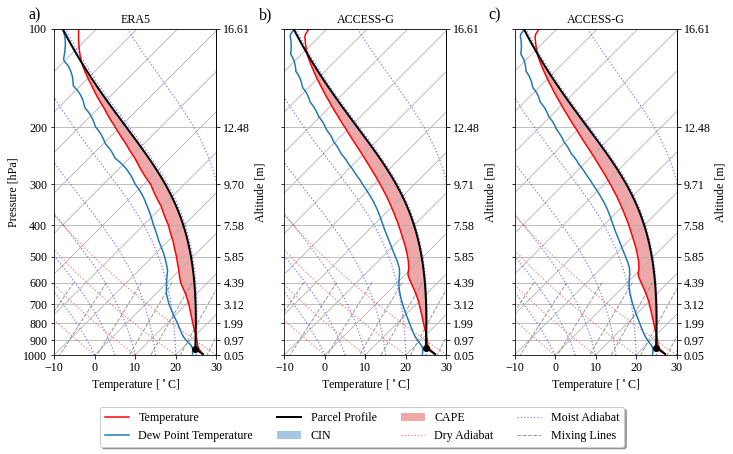

In [258]:
figsize = (12, 6)
fig = plt.figure(figsize=figsize)
ax1 = sd.plot_skewt(
    ERA5_soundings, fig=fig, subplots=(1, 3, 1), legend=False, 
    right_ticks=False, title='ERA5')
ax2 = sd.plot_skewt(
    ACCESS_G_soundings, fig=fig, subplots=(1, 3, 2), legend=False,
    left_ticks=False, right_ticks=True, title='ACCESS-G')
ax3 = sd.plot_skewt(
    ACCESS_G_soundings, fig=fig, subplots=(1, 3, 3), legend=False,
    left_ticks=False, title='ACCESS-G')
plt.subplots_adjust(wspace=.1)

cl.make_subplot_labels([ax1, ax2, ax3], x_shift=-.16, y_shift=.03)

ax1.legend(
    loc='lower center', bbox_to_anchor=(1.9, -0.3),
    ncol=4, fancybox=True, shadow=True)